In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, classification_report
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr 


In [3]:
# Reading the csv file
df=pd.read_csv('ccfd.csv')

In [ ]:
# Detail information regarding any missing value for any column and their respective datatypes
df.info()

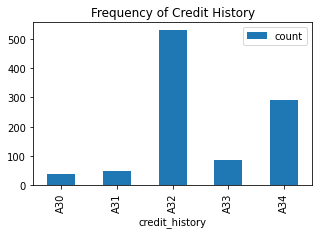

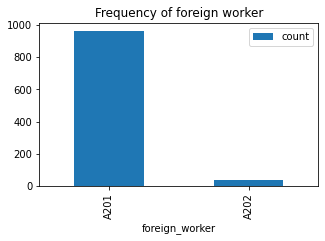

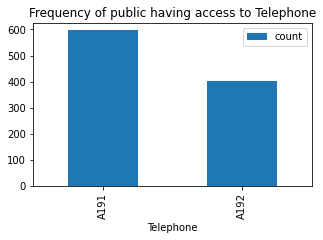

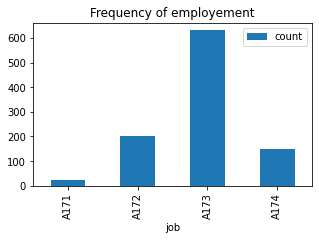

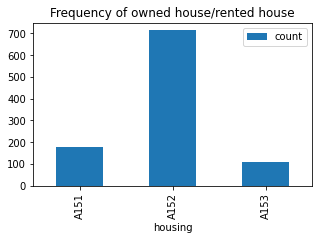

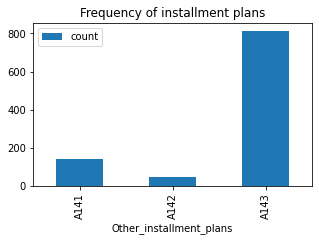

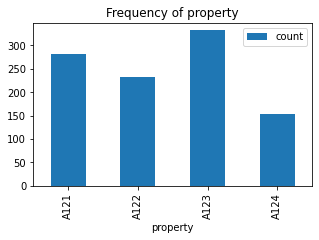

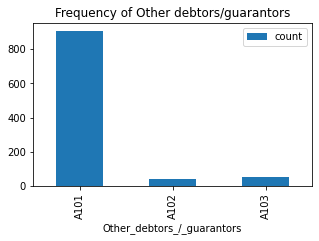

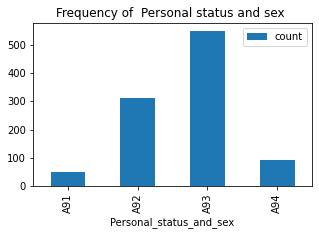

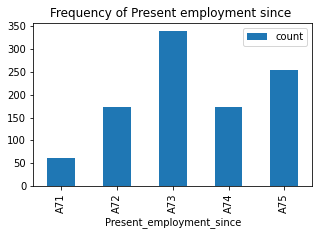

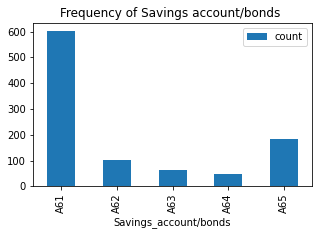

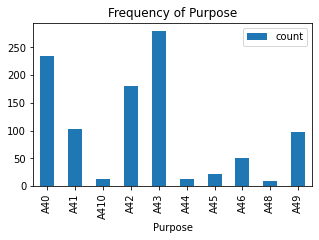

In [ ]:
# Getting the frequency bar chart for every categorical variable 
fig0, ax0 = subplots()
df.groupby(['Status_of_existing_checking_account']).agg(['count'])['class'].plot(kind='bar',figsize=(5,3), title='Frequency of status of existing checking account', ax=ax0)
fig, ax = subplots()
df.groupby(['credit_history']).agg(['count'])['class'].plot(kind='bar',figsize=(5,3), title='Frequency of Credit History', ax=ax)
fig1, ax1 = subplots()
df.groupby(['foreign_worker']).agg(['count'])['class'].plot(kind='bar',figsize=(5,3), title='Frequency of foreign worker', ax=ax1)
fig2, ax2 = subplots()
df.groupby(['Telephone']).agg(['count'])['class'].plot(kind='bar',figsize=(5,3), title='Frequency of public having access to Telephone', ax=ax2)
fig3, ax3 = subplots()
df.groupby(['job']).agg(['count'])['class'].plot(kind='bar',figsize=(5,3), title='Frequency of employement', ax=ax3)
fig4, ax4 = subplots()
df.groupby(['housing']).agg(['count'])['class'].plot(kind='bar',figsize=(5,3), title='Frequency of owned house/rented house', ax=ax4)
fig5, ax5 = subplots()
df.groupby(['Other_installment_plans']).agg(['count'])['class'].plot(kind='bar',figsize=(5,3), title='Frequency of installment plans', ax=ax5)
fig6, ax6 = subplots()
df.groupby(['property']).agg(['count'])['class'].plot(kind='bar',figsize=(5,3), title='Frequency of property', ax=ax6)
fig7, ax7 = subplots()
df.groupby(['Other_debtors_/_guarantors']).agg(['count'])['class'].plot(kind='bar',figsize=(5,3), title='Frequency of Other debtors/guarantors', ax=ax7)
fig8, ax8 = subplots()
df.groupby(['Personal_status_and_sex']).agg(['count'])['class'].plot(kind='bar',figsize=(5,3), title='Frequency of  Personal status and sex ', ax=ax8)
fig9, ax9 = subplots()
df.groupby(['Present_employment_since']).agg(['count'])['class'].plot(kind='bar',figsize=(5,3), title='Frequency of Present employment since ', ax=ax9)
fig10, ax10 = subplots()
df.groupby(['Savings_account/bonds']).agg(['count'])['class'].plot(kind='bar',figsize=(5,3), title='Frequency of Savings account/bonds ', ax=ax10)
fig11, ax11 = subplots()
df.groupby(['Purpose']).agg(['count'])['class'].plot(kind='bar',figsize=(5,3), title='Frequency of Purpose', ax=ax11)

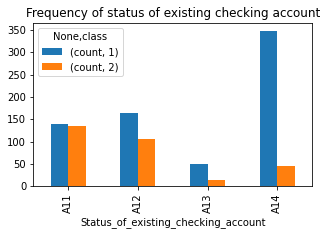

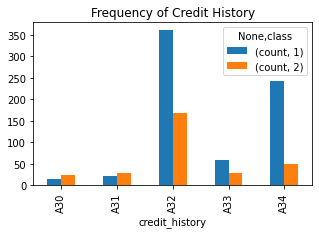

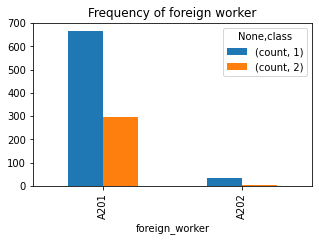

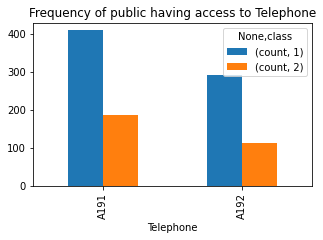

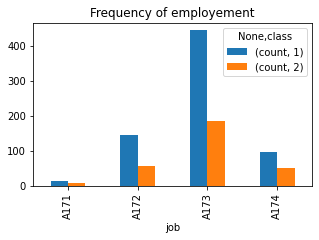

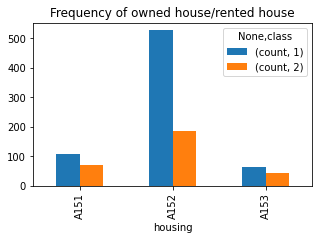

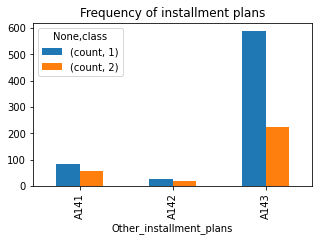

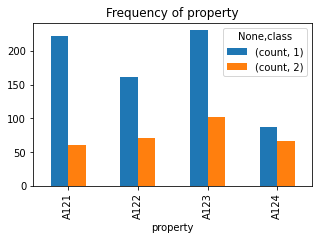

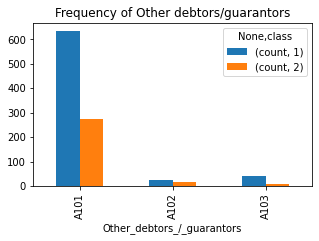

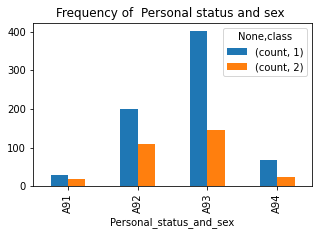

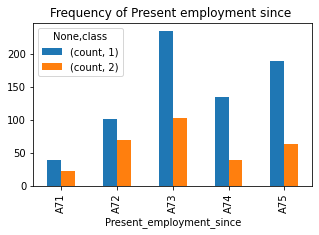

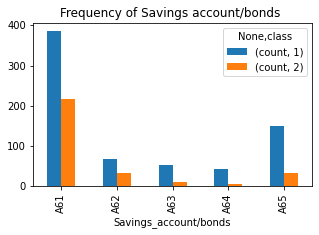

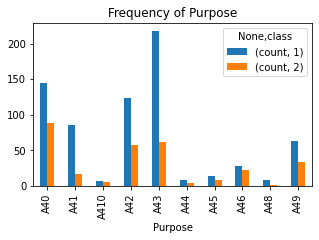

In [ ]:
# Getting the frequency bar chart for every categorical variable with respect to class variable
# Class 1 is non-fraud and class 2 resembles fraud cases
fig0,ax0=subplots()
df.groupby(['Status_of_existing_checking_account', 'class']).agg(['count'])['age'].unstack().plot(kind='bar',figsize=(5,3), title='Frequency of status of existing checking account', ax=ax0)
fig, ax = subplots()
df.groupby(['credit_history', 'class']).agg(['count'])['age'].unstack().plot(kind='bar',figsize=(5,3), title='Frequency of Credit History', ax=ax)
fig1, ax1 = subplots()
df.groupby(['foreign_worker', 'class']).agg(['count'])['age'].unstack().plot(kind='bar',figsize=(5,3), title='Frequency of foreign worker', ax=ax1)
fig2, ax2 = subplots()
df.groupby(['Telephone', 'class']).agg(['count'])['age'].unstack().plot(kind='bar',figsize=(5,3), title='Frequency of public having access to Telephone', ax=ax2)
fig3, ax3 = subplots()
df.groupby(['job', 'class']).agg(['count'])['age'].unstack().plot(kind='bar',figsize=(5,3), title='Frequency of employement', ax=ax3)
fig4, ax4 = subplots()
df.groupby(['housing', 'class']).agg(['count'])['age'].unstack().plot(kind='bar',figsize=(5,3), title='Frequency of owned house/rented house', ax=ax4)
fig5, ax5 = subplots()
df.groupby(['Other_installment_plans', 'class']).agg(['count'])['age'].unstack().plot(kind='bar',figsize=(5,3), title='Frequency of installment plans', ax=ax5)
fig6, ax6 = subplots()
df.groupby(['property', 'class']).agg(['count'])['age'].unstack().plot(kind='bar',figsize=(5,3), title='Frequency of property', ax=ax6)
fig7, ax7 = subplots()
df.groupby(['Other_debtors_/_guarantors', 'class']).agg(['count'])['age'].unstack().plot(kind='bar',figsize=(5,3), title='Frequency of Other debtors/guarantors', ax=ax7)
fig8, ax8 = subplots()
df.groupby(['Personal_status_and_sex', 'class']).agg(['count'])['age'].unstack().plot(kind='bar',figsize=(5,3), title='Frequency of  Personal status and sex ', ax=ax8)
fig9, ax9 = subplots()
df.groupby(['Present_employment_since', 'class']).agg(['count'])['age'].unstack().plot(kind='bar',figsize=(5,3), title='Frequency of Present employment since ', ax=ax9)
fig10, ax10 = subplots()
df.groupby(['Savings_account/bonds', 'class']).agg(['count'])['age'].unstack().plot(kind='bar',figsize=(5,3), title='Frequency of Savings account/bonds ', ax=ax10)
fig11, ax11 = subplots()
df.groupby(['Purpose', 'class']).agg(['count'])['age'].unstack().plot(kind='bar',figsize=(5,3), title='Frequency of Purpose', ax=ax11)

In [4]:
numerical_columns=['Duration_in_month', 'Credit_amount', 'Installment_rate', 'Present_residence_since', 'age', 'existing_credits', 'people_being_liable_to_provide_maintenance_for']

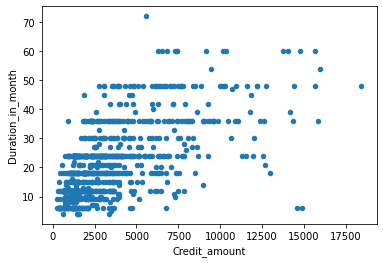

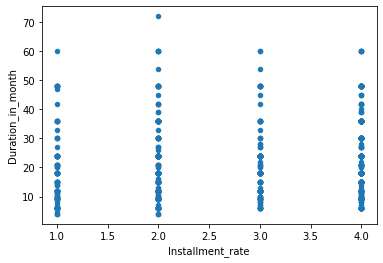

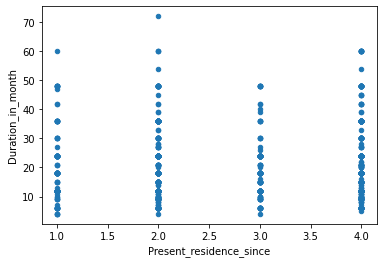

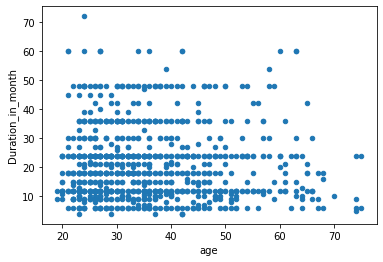

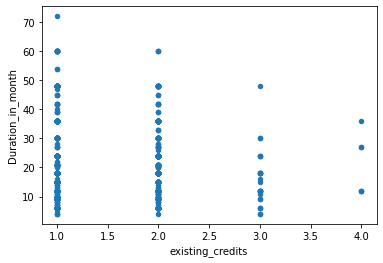

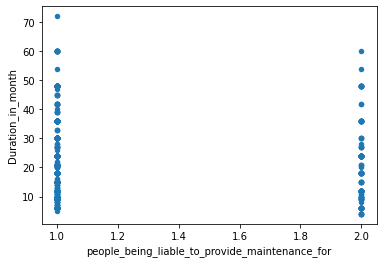

In [ ]:
# Getting scatter plot between every continuous attribute
df.plot.scatter(y='Duration_in_month',x='Credit_amount')
df.plot.scatter(y='Duration_in_month',x='Installment_rate')
df.plot.scatter(y='Duration_in_month',x='Present_residence_since')
df.plot.scatter(y='Duration_in_month',x='age')
df.plot.scatter(y='Duration_in_month',x='existing_credits')
df.plot.scatter(y='Duration_in_month',x='people_being_liable_to_provide_maintenance_for')

In [5]:
# Converting the above obtained columns from numerical to string since they had very small number of distinct values
df['people_being_liable_to_provide_maintenance_for']=df['people_being_liable_to_provide_maintenance_for'].astype(str)
df['existing_credits']=df['existing_credits'].astype(str)
df['Present_residence_since']=df['Present_residence_since'].astype(str)
df['Installment_rate']=df['Installment_rate'].astype(str)
df['class']=df['class'].astype(str)

In [6]:

print(pearsonr(df['Duration_in_month'],df['Credit_amount']))
print(pearsonr(df['age'],df['Duration_in_month']))
print(pearsonr(df['age'],df['Credit_amount']))

(0.6249841983009835, 1.8628512880465833e-109)
(-0.03613637401909836, 0.2535886666856024)
(0.032716416665448105, 0.3013387999560719)


In [ ]:
# Performing the chi-square test on categorical attributes
categorical_columns=list(set(set(df.columns)-set(numerical_columns))-set(['class']))
dependent_columns=[]
remove_columns=[]
for i in range(0,len(categorical_columns)):
  data=pd.crosstab(df[categorical_columns[i]],df['class'])
  stat, p, dof, expected = chi2_contingency(data)
  print(p)
  if(p<=0.05):
    print(categorical_columns[i]+' dependent')
    dependent_columns.append(categorical_columns[i])
  else:
    print(categorical_columns[i]+' independent')
    remove_columns.append(categorical_columns[i])
print(dependent_columns)

In [8]:
df_copy=df

In [9]:
# Removing the redundant columns based on chi-square test
df_copy=df_copy.drop(columns=remove_columns)

In [12]:
# Plotting histogram for credit amount turned to be positiveliy skewed
df_copy['Credit_amount'].hist(bins=12)

# Applying log transform to get normally distributed credit amount
df_copy['Credit_amount']=np.log10(df_copy.Credit_amount)

In [13]:
# Distirbuting the credit amount categories based on the mean and standard deviation
mu=df_copy.Credit_amount.mean()
stdev=df_copy.Credit_amount.std()

df_copy.loc[(df_copy['Credit_amount']<(mu-stdev)),'credit_groups']='low'
df_copy.loc[(df_copy['Credit_amount']>=(mu-stdev)) & (df_copy['Credit_amount']<(mu+stdev)),'credit_groups']='medium'
df_copy.loc[(df_copy['Credit_amount']>=(mu+stdev)),'credit_groups']='high'
df_copy=df_copy.drop(columns=['Credit_amount'])

In [14]:
# Categorizing the age group into three categories 
df_copy.loc[df_copy['age']<40,'age_groups']='young'
df_copy.loc[(df_copy['age']>=40) & (df_copy['age']<65),'age_groups']='middle-aged'
df_copy.loc[df_copy['age']>=65,'age_groups']='elder'
df_copy=df_copy.drop(columns=['age'])

In [15]:
# Performing label encoding on every selected attribute
lst_columns=df_copy.columns
labelencode=LabelEncoder()

for i in range(0,len(lst_columns)):
  df_copy[lst_columns[i]]=labelencode.fit_transform(df_copy[lst_columns[i]])

In [16]:
# Splitting the dataset between 80% and 20% for training an testing respectively
data_split_pct=0.2
df_copy_train, df_copy_test=train_test_split(df_copy,test_size=data_split_pct)

df_copy_train_wo_class=df_copy_train.drop(columns=['class'])
df_copy_test_wo_class=df_copy_test.drop(columns=['class'])

In [22]:
# Naive Bayes Classifier
classifier=CategoricalNB(alpha=0.0001)
classifier.fit(df_copy_train_wo_class,df_copy_train['class'])

confusion_matrix(df_copy_test['class'].tolist(),classifier.predict(df_copy_test_wo_class))

CategoricalNB(alpha=0.0001, class_prior=None, fit_prior=True)

In [ ]:
# Retrieving the values of true positive and false positive for Naive Bayes 
nb_pred=classifier.predict_proba(df_copy_test_wo_class)
nb_pred=nb_pred[:,1]
nb_auc=roc_auc_score(df_copy_test['class'].tolist(),nb_pred)
nb_fpr,nb_tpr,threshold=roc_curve(df_copy_test['class'].tolist(), nb_pred)



In [17]:
# ID3
dt=DecisionTreeClassifier(criterion='entropy', 
                          splitter='best', 
                          min_samples_split=10, 
                          min_samples_leaf=5, 
                          max_depth=12, max_features=17, 
                          max_leaf_nodes=60, 
                          random_state=1)
dt.fit(df_copy_train_wo_class,df_copy_train['class'].tolist())
confusion_matrix(df_copy_test['class'].tolist(),dt.predict(df_copy_test_wo_class))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=12, max_features=17, max_leaf_nodes=60,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
# Retrieving the values of true positive and false positive for ID3

predictions = dt.predict_proba(df_copy_test_wo_class)
print(roc_auc_score(df_copy_test['class'].tolist(), predictions[:,1]))
fpr, tpr, threshold = roc_curve(df_copy_test['class'].tolist(), predictions[:,1])

0.7653776571687019
0.6483491632745364


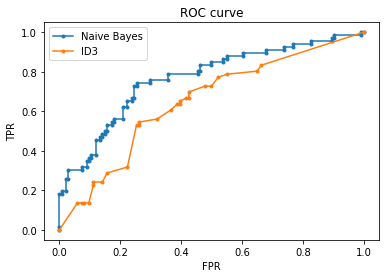

In [28]:
# Plotting the auc roc curve for both the algorithms
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr, marker='.', label='ID3')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()
plt.savefig('roc.png')

plt.show()